In [4]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 2: Load the Dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


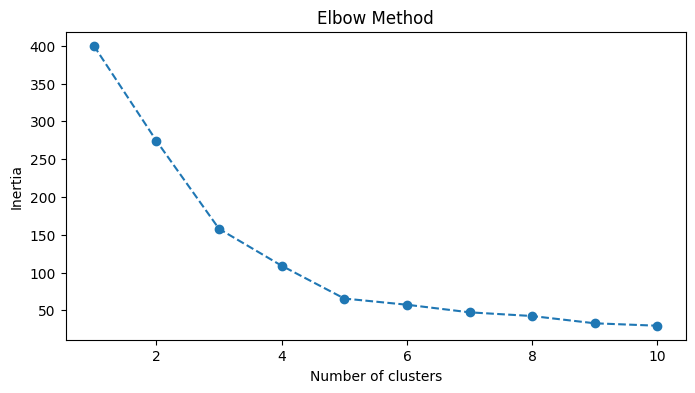

In [5]:

# Step 3: Preprocess the Data
# We only use 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


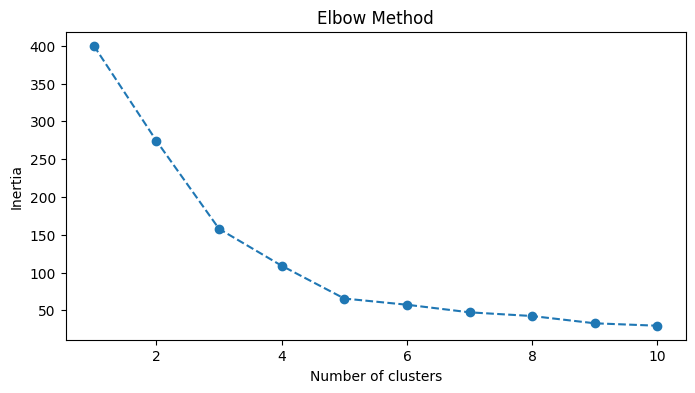

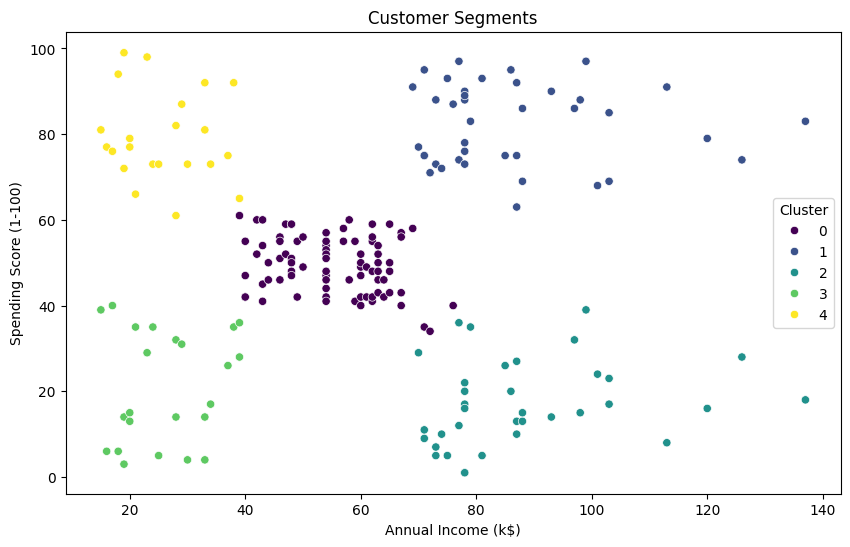

Silhouette Score: 0.55
Cluster Centers (Annual Income, Spending Score):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [6]:

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow graph, let's choose an optimal number of clusters, say 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Step 5: Visualize the Clusters
df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Step 6: Evaluate the Model
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Display cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Annual Income, Spending Score):")
print(centers)